<a href="https://colab.research.google.com/github/bhanuteja2001/SegPC-2021/blob/main/Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Segpc2021

/content/drive/MyDrive/Segpc2021


In [3]:
!unzip "/content/drive/MyDrive/Segpc2021/train.zip"

Archive:  /content/drive/MyDrive/Segpc2021/train.zip
   creating: train/
   creating: train/x/
  inflating: train/x/106.bmp         
  inflating: train/x/108.bmp         
  inflating: train/x/109.bmp         
  inflating: train/x/111.bmp         
  inflating: train/x/112.bmp         
  inflating: train/x/114.bmp         
  inflating: train/x/1697.bmp        
  inflating: train/x/1698.bmp        
  inflating: train/x/1714.bmp        
  inflating: train/x/1722.bmp        
  inflating: train/x/1724.bmp        
  inflating: train/x/1726.bmp        
  inflating: train/x/1727.bmp        
  inflating: train/x/1730.bmp        
  inflating: train/x/1740.bmp        
  inflating: train/x/1743.bmp        
  inflating: train/x/1775.bmp        
  inflating: train/x/1778.bmp        
  inflating: train/x/1783.bmp        
  inflating: train/x/1792.bmp        
  inflating: train/x/1798.bmp        
  inflating: train/x/1800.bmp        
  inflating: train/x/1801.bmp        
  inflating: train/x/1802.bmp  

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
import os
import os
import random
import re
from PIL import Image

DATA_PATH = '/content/drive/MyDrive/Segpc2021/train/'
FRAME_PATH = "/content/drive/MyDrive/Segpc2021/train/x/"
MASK_PATH = "/content/drive/MyDrive/Segpc2021/train/y/"

In [13]:
NEW_MASK_PATH = '/content/drive/MyDrive/Segpc2021/train/y_new/'

In [ ]:
os.listdir("/content/drive/MyDrive")

['covid_image_data', 'Colab Notebooks', 'SegPC-2021']

In [7]:
len(os.listdir("/content/drive/MyDrive/Segpc2021/train/x"))

298

In [8]:
# Get all frames and masks, sort them, shuffle them to generate data sets.

all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)


all_frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[0-9]+', var)])
all_masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[0-9]+', var)])




In [9]:
grand_temp = []
for f1 in all_frames:
  temp = []
  for f2 in all_masks:
    if ord(f2[3]) == 95:
      f3 = f2[0:3] + '.bmp'
    elif ord(f2[4]) == 95:
      f3 = f2[0:4] + '.bmp'
    if f1 == f3:
      temp.append(f2)
  grand_temp.append(temp)
grand_temp

[['106_1.bmp', '106_2.bmp', '106_3.bmp', '106_4.bmp', '106_5.bmp'],
 ['108_1.bmp', '108_2.bmp', '108_3.bmp', '108_4.bmp'],
 ['109_1.bmp', '109_2.bmp', '109_3.bmp', '109_4.bmp', '109_5.bmp'],
 ['111_1.bmp', '111_2.bmp'],
 ['112_1.bmp', '112_2.bmp', '112_3.bmp', '112_4.bmp'],
 ['114_1.bmp', '114_2.bmp', '114_3.bmp'],
 ['201_1.bmp', '201_2.bmp', '201_3.bmp', '201_4.bmp', '201_5.bmp'],
 ['202_1.bmp',
  '202_2.bmp',
  '202_3.bmp',
  '202_4.bmp',
  '202_5.bmp',
  '202_6.bmp'],
 ['210_1.bmp', '210_2.bmp', '210_3.bmp', '210_4.bmp', '210_5.bmp'],
 ['212_1.bmp', '212_2.bmp'],
 ['213_1.bmp',
  '213_2.bmp',
  '213_3.bmp',
  '213_4.bmp',
  '213_5.bmp',
  '213_6.bmp'],
 ['214_1.bmp', '214_2.bmp'],
 ['215_1.bmp', '215_2.bmp', '215_3.bmp'],
 ['216_1.bmp', '216_2.bmp', '216_3.bmp', '216_4.bmp'],
 ['303_1.bmp', '303_2.bmp', '303_3.bmp', '303_4.bmp', '303_5.bmp'],
 ['306_1.bmp',
  '306_2.bmp',
  '306_3.bmp',
  '306_4.bmp',
  '306_5.bmp',
  '306_6.bmp',
  '306_7.bmp',
  '306_8.bmp',
  '306_9.bmp'],
 ['307

(1920, 2560, 3)


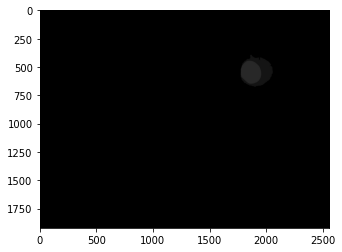

In [10]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Segpc2021/train/y/"+os.listdir(MASK_PATH)[2]) 
plt.imshow(img)
print(img.shape)

In [ ]:
img.shape

(1536, 2040, 3)

In [ ]:
grand_temp[0][1][:-4]

'106_2'

106


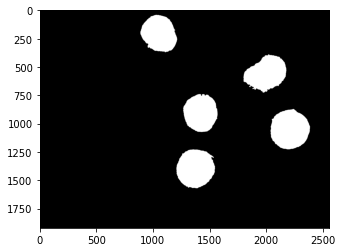

In [11]:
result = 0
for pic in grand_temp[0]:
  #print(pic)
  path = MASK_PATH + pic
  mask_ = cv2.imread(path)
  mask_ = mask_.astype("float32")
  result += mask_
print(pic[0:3])
result = 255*result
result = result.clip(0,255).astype("uint8")
plt.imshow(result)

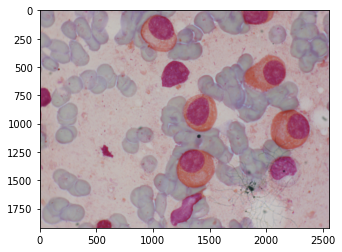

In [ ]:
image = cv2.imread(FRAME_PATH + "106.bmp")
plt.imshow(image)

In [14]:
for mak in grand_temp:
  result = 0
  for pic in mak:
    path = MASK_PATH + pic
    mask_ = cv2.imread(path)
    mask_ = mask_.astype("float32")
    result += mask_
  print(pic[0:3])
  result = 255*result
  result = result.clip(0,255).astype("uint8")
  #plt.imshow(result)
  if ord(pic[3]) == 95:
    pic = pic[0:3] + '.bmp'
  elif ord(pic[4]) == 95:
    pic = pic[0:4] + '.bmp'
  cv2.imwrite(NEW_MASK_PATH + pic, result)

106
108
109
111
112
114
201
202
210
212
213
214
215
216
303
306
307
308
408
410
411
412
413
414
416
503
504
510
517
520
601
603
606
169
169
171
172
172
172
172
173
174
174
177
177
178
179
179
180
180
180
180
180
180
181
181
181
182
183
183
184
185
185
186
186
186
187
188
189
189
190
190
190
190
192
193
193
193
193
194
195
196
196
196
197
198
198
198
198
199
199
199
200
200
200
201
203
203
204
204
204
204
205
205
205
206
207
207
207
208
208
208
209
209
210
210
210
211
211
211
211
212
212
212
213
213
214
214
214
214
214
214
215
216
217
217
218
218
219
219
219
220
220
220
221
224
224
225
225
226
226
227
227
227
227
228
228
228
229
229
230
230
230
230
232
232
233
233
233
234
234
234
235
235
236
236
237
239
239
240
241
241
242
243
243
243
243
929
929
933
934
934
935
935
935
936
936
936
937
937
938
938
941
941
941
942
942
942
942
942
943
943
944
945
945
945
945
947
948
948
948
949
950
951
951
952
952
957
957
957
957
959
959
960
960
960
961
961
961
961
963
964
965
965
965
965
965
965
966
966


In [15]:
len(os.listdir(NEW_MASK_PATH)) == len(os.listdir(FRAME_PATH))

True

In [16]:
DATA_PATH = '/content/drive/MyDrive/Segpc2021/train/'
FRAME_PATH = "/content/drive/MyDrive/Segpc2021/train/x/"
MASK_PATH = "/content/drive/MyDrive/Segpc2021/train/y/"

In [ ]:
def fin(masks,frame):
  em = []
  for f in masks:
    f_1 = f[0:3]+".bmp"
    if f_1 in frame:
      em.append(f)
  return em

In [ ]:
# Create folders to hold images and masks

folders = ['train_frames', 'train_masks', 'val_frames', 'val_masks', 'test_frames', 'test_masks']


for folder in folders:
  os.makedirs(DATA_PATH + folder)
  


# Get all frames and masks, sort them, shuffle them to generate data sets.

all_frames = os.listdir(FRAME_PATH)
all_masks = os.listdir(MASK_PATH)


all_frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[0-9]+', var)])
all_masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[0-9]+', var)])


random.seed(230)
random.shuffle(all_frames)


# Generate train, val, and test sets for frames

train_split = int(0.7*len(all_frames))
val_split = int(0.9 * len(all_frames))

train_frames = all_frames[:train_split]
val_frames = all_frames[train_split:val_split]
test_frames = all_frames[val_split:]


# Generate corresponding mask lists for masks

train_masks = fin(all_masks,train_frames)
val_masks = fin(all_masks,val_frames)
test_masks = fin(all_masks,test_frames)

In [ ]:
frame_folders = [(train_frames, 'train_frames'), (val_frames, 'val_frames'), 
                 (test_frames, 'test_frames')]

mask_folders = [(train_masks, 'train_masks'), (val_masks, 'val_masks'), 
                (test_masks, 'test_masks')]

In [ ]:
name[1][0:4]

'test'

In [ ]:
#Add train, val, test frames and masks to relevant folders


def add_frames(dir_name, image):
  
  img = Image.open(FRAME_PATH+image)
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image)
  
  
  
def add_masks(dir_name, image):
  
  img = Image.open(MASK_PATH+image)
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image)



# Add frames

for folder in frame_folders:
  
  array = folder[0]
  name = [folder[1]] * len(array)

  list(map(add_frames, name, array))
         
    
# Add masks

for folder in mask_folders:
  
  array = folder[0]
  name = [folder[1]] * len(array)
  
  list(map(add_masks, name, array))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        channel_shift_range=150.0,
        vertical_flip=True,
        horizontal_flip=True)
        
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_image_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/SegPC-2021/train/train_frames/',
    batch_size = 16)

train_mask_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/SegPC-2021/train/train_masks/',
    batch_size = 16)

val_image_generator = val_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/SegPC-2021/train/val_frames/',
    batch_size = 16)


val_mask_generator = val_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/SegPC-2021/train/val_masks/',
    batch_size = 16)



train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

Found 208 images belonging to 1 classes.
Found 118 images belonging to 1 classes.
Found 60 images belonging to 1 classes.
Found 68 images belonging to 1 classes.


In [ ]:
#Step 1: Load libraries for the U-net Model
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
#from tensorflow import keras
import tensorflow as tf

#Step 2: Define the U-net model
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = tf.keras.Input(shape=input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', dilation_rate=2,padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', dilation_rate=2,padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', dilation_rate=2,padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', dilation_rate=2, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4, training=True)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5, training=True)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
   
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = tf.keras.Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = 'accuracy')
    

    if(pretrained_weights):
    	model=keras.models.load_model(pretrained_weights)

    return model

In [ ]:
#Step 3:Define functions for pre-processing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import skimage.io as io
import skimage.transform as trans
import matplotlib.pyplot as plt
import scipy.misc as sc


def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img /= 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
        #print(np.shape(mask),np.shape(img))
    return (img,mask)



def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (512,512),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)


def testGenerator(test_path,num_image = 30,target_size = (512,512),flag_multi_class = False,as_gray = True):
    files=sorted(os.listdir(test_path))
    num_image=len(files)
    for i in range(num_image):
        img = io.imread(os.path.join(test_path,files[i]),as_gray = as_gray)
        print(files[i])
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [ ]:
#Step 4: Define function to save the test images
def labelVisualize(num_class,color_dict,img):
    img = img[:,:,0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i] = color_dict[i]
      
    return img_out


def saveResult(img_path,save_path,npyfile,flag_multi_class = False,num_class = 2):
    files=os.listdir(img_path)
    #print(len(img_path))
    #print(len(npyfile))
    
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        #img1=np.array(((img - np.min(img))/np.ptp(img))>0.6).astype(float)
        img[img>0.1]=1
        img[img<=0.1]=0
        io.imsave(os.path.join(save_path, files[i]+'_predict.png'),img)


In [ ]:
#Step 5: Define functions to evaluate the output
import sklearn.metrics as sm

def get_confusion_matrix_elements(groundtruth_list, predicted_list):
    """returns confusion matrix elements i.e TN, FP, FN, TP as floats
	See example code for helper function definitions
    """
    tn, fp, fn, tp = sm.confusion_matrix(groundtruth_list, predicted_list,labels=[0,1]).ravel()
    tn, fp, fn, tp = np.float64(tn), np.float64(fp), np.float64(fn), np.float64(tp)

    return tn, fp, fn, tp

def get_prec_rec_IoU_accuracy(groundtruth_list, predicted_list):
    """returns precision, recall, IoU and accuracy metrics
	"""
    tn, fp, fn, tp = get_confusion_matrix_elements(groundtruth_list, predicted_list)
    
    total = tp + fp + fn + tn
    accuracy = (tp + tn) / total
    prec=tp/(tp+fp)
    rec=tp/(tp+fn)
    IoU=tp/(tp+fp+fn)
    
    return prec,rec,IoU,accuracy

def get_f1_score(groundtruth_list, predicted_list):
    """Return f1 score covering edge cases"""

    tn, fp, fn, tp = get_confusion_matrix_elements(groundtruth_list, predicted_list)
    
    f1_score = (2 * tp) / ((2 * tp) + fp + fn)

    return f1_score

def get_validation_metrics(groundtruth,predicted):
    """Return all output metrics. Input is binary images"""
   
    u,v=np.shape(groundtruth)
    groundtruth_list=np.reshape(groundtruth,(u*v,))
    predicted_list=np.reshape(predicted,(u*v,))
    prec,rec,IoU,acc=get_prec_rec_IoU_accuracy(groundtruth_list, predicted_list)
    f1_score=get_f1_score(groundtruth_list, predicted_list)
   # print("Precision=",prec, "Recall=",rec, "IoU=",IoU, "acc=",acc, "F1=",f1_score)
    return prec,rec,IoU,acc,f1_score

def evalResult(gth_path,npyfile,target_size=(512,512),flag_multi_class = False,num_class = 2):
    files=sorted(os.listdir(gth_path))
    print(files)
    prec=0
    rec=0
    acc=0
    IoU=0
    f1_score=0
    for i,item in enumerate(npyfile):
        img = item[:,:,0]
        gth = io.imread(os.path.join(gth_path,files[i]))
        gth = trans.resize(gth,target_size)
        img1=np.array(((img - np.min(img))/np.ptp(img))>0.1).astype(float)
        gth1=np.array(((gth - np.min(gth))/np.ptp(gth))>0.1).astype(float)
        p,r,I,a,f=get_validation_metrics(gth1,img1)
        prec=prec+p
        rec=rec+r
        acc=acc+a
        IoU=IoU+I
        f1_score=f1_score+f
    print("Precision=",prec/(i+1), "Recall=",rec/(i+1), "IoU=",IoU/(i+1), "acc=",acc/(i+1), "F1=",f1_score/(i+1))

In [ ]:
#Step 1: Call to image data generator in keras
data_gen_args = dict(rescale=1./255,
                     channel_shift_range=150.0,
                     vertical_flip=True,
                     horizontal_flip=True)

PATH='./STARE/train/'

In [ ]:
if not os.path.exists(PATH+'aug'):
    os.makedirs(PATH+'aug')
    
if not os.path.exists('./STARE/test/'+'pred'):
    os.makedirs('./STARE/test/'+'pred')    
data_gen = trainGenerator(3,PATH,'images','GT',data_gen_args, save_to_dir = PATH+'aug')

In [ ]:


#Step 2: Initialize the model. Train from scratch!
model = unet()
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
#Step 3: Initialize Tensorboard to monitor changes in Model Loss 
import datetime
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
#Step 4: Fit the u-net model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('unet_STARE.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(data_gen,steps_per_epoch=10,epochs=80,verbose=0,callbacks=[model_checkpoint,tensorboard_callback])

In [ ]:
#Visualize on tensorboard
%tensorboard --logdir logs/fit


https://github.com/sohiniroych/Unet-using-TF2/blob/main/U-net_TF2_retinal_image_segmentation_STARE.ipynb

In [ ]:
https://github.com/sohiniroych/Unet-using-TF2/blob/main/U-net_TF2_retinal_image_segmentation_STARE.ipynb